# <font color=900C3F>LIMPEZA DE DATOS (VALORES NULOS Y OUTLIERS)</font>

---

## <font color=#FF5733>REQUISITOS:</font>

> Los datos importados en este cuaderno han sido organizados en una fase anterior a esta, donde los datos, han pasado por un procesamiento de carga, tratamiento de estructura de columnas, traducción al español y fusion de los datos en un unico CSV.
> 
> El proceso de limpieza de los datos tiene como objetivo verificar si hay valores nulos y outiliers en el conjunto de datos importados a este cuaderno.
> 
> Outiliers son valores atípicos que pueden presentarse en un conjunto de datos y deben ser tratados.
> 
> El proceso de limpieza de Outiliers debe aplicar la técnica de los "Cuartiles" para eliminar los valores atípicos.
> 
> El proceso de tratamiento de Outliers empieza después del tratamiento de valores nulos.
>  
> Después de hacer la limpieza de los datos, este proceso debe generar un fichero en formato CSV, para ser usado en la proxima fase del proyecto.

---

## <font color=#FF5733>Importar Librerías</font>

In [178]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno
%matplotlib inline

## <font color=#FF5733>Importar CSVs</font>

### <font color=#186a3b>--> Definir las rutas de los ficheros leídos y generados en el proceso de carga de datos </font>

In [179]:
# Definir la ruta donde se encuentra la carpeta y los CSVs que iremos trabajar
ruta_nuevoCSV = '../data/ficheros_procesados/datos_preprocesados_limpios.csv'
ruta_datos_preprocesados = '../data/ficheros_procesados/datos_preprocesados.csv'

# Creación del DataFrame
df = pd.read_csv(ruta_datos_preprocesados, delimiter=",", engine="python")
df.head(2)

,ANO,PAIS,REGION,ECONOMIA_PIB_PER_CAPITA,APOYO_SOCIAL,SALUD_ESPERANZA_DE_VIDA,LIBERTAD,PERCEPCION_CORRUPCION,GENEROSIDAD
0,2015,Islandia,Europa Occidental,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
1,2015,Dinamarca,Europa Occidental,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139


### Cantidad de datos importados

In [180]:
df.shape

(54, 9)

### Estadística Descriptiva - SITUACIÓN ACTUAL

#### Estructura de columnas (tipos de datos)

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ANO                      54 non-null     int64  
 1   PAIS                     54 non-null     object 
 2   REGION                   54 non-null     object 
 3   ECONOMIA_PIB_PER_CAPITA  54 non-null     float64
 4   APOYO_SOCIAL             54 non-null     float64
 5   SALUD_ESPERANZA_DE_VIDA  54 non-null     float64
 6   LIBERTAD                 54 non-null     float64
 7   PERCEPCION_CORRUPCION    54 non-null     float64
 8   GENEROSIDAD              54 non-null     float64
dtypes: float64(6), int64(1), object(2)
memory usage: 3.9+ KB


#### Resumen 1: Estadística Descriptiva

In [182]:
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,ANO,ECONOMIA_PIB_PER_CAPITA,APOYO_SOCIAL,SALUD_ESPERANZA_DE_VIDA,LIBERTAD,PERCEPCION_CORRUPCION,GENEROSIDAD
count,54.00,54.00,54.00,54.00,54.00,54.00,54.00
mean,2019.00,1.51,1.39,0.84,0.62,0.33,0.26
std,2.61,0.23,0.19,0.14,0.10,0.16,0.09
min,2015.00,1.23,1.06,0.54,0.36,0.06,0.10
25%,2017.00,1.34,1.22,0.79,0.58,0.15,0.19
50%,2019.00,1.44,1.48,0.85,0.65,0.39,0.25
75%,2021.00,1.57,1.55,0.95,0.69,0.45,0.35
max,2023.00,2.00,1.64,1.06,0.77,0.54,0.48


#### Resumen 2: Estadística Descriptiva

In [183]:
# df.describe().round(2).T
df.describe().T.apply(lambda s: s.apply('{0:.2f}'.format))


,count,mean,std,min,25%,50%,75%,max
ANO,54.00,2019.00,2.61,2015.00,2017.00,2019.00,2021.00,2023.00
ECONOMIA_PIB_PER_CAPITA,54.00,1.51,0.23,1.23,1.34,1.44,1.57,2.00
APOYO_SOCIAL,54.00,1.39,0.19,1.06,1.22,1.48,1.55,1.64
SALUD_ESPERANZA_DE_VIDA,54.00,0.84,0.14,0.54,0.79,0.85,0.95,1.06
LIBERTAD,54.00,0.62,0.10,0.36,0.58,0.65,0.69,0.77
PERCEPCION_CORRUPCION,54.00,0.33,0.16,0.06,0.15,0.39,0.45,0.54
GENEROSIDAD,54.00,0.26,0.09,0.10,0.19,0.25,0.35,0.48


## <font color=#FF5733>Verificar si hay valores Nulos</font>

In [184]:
df.isnull().sum()

ANO                        0
PAIS                       0
REGION                     0
ECONOMIA_PIB_PER_CAPITA    0
APOYO_SOCIAL               0
SALUD_ESPERANZA_DE_VIDA    0
LIBERTAD                   0
PERCEPCION_CORRUPCION      0
GENEROSIDAD                0
dtype: int64

Visualizar si hay valores nulos en la Gráfica

<Axes: >

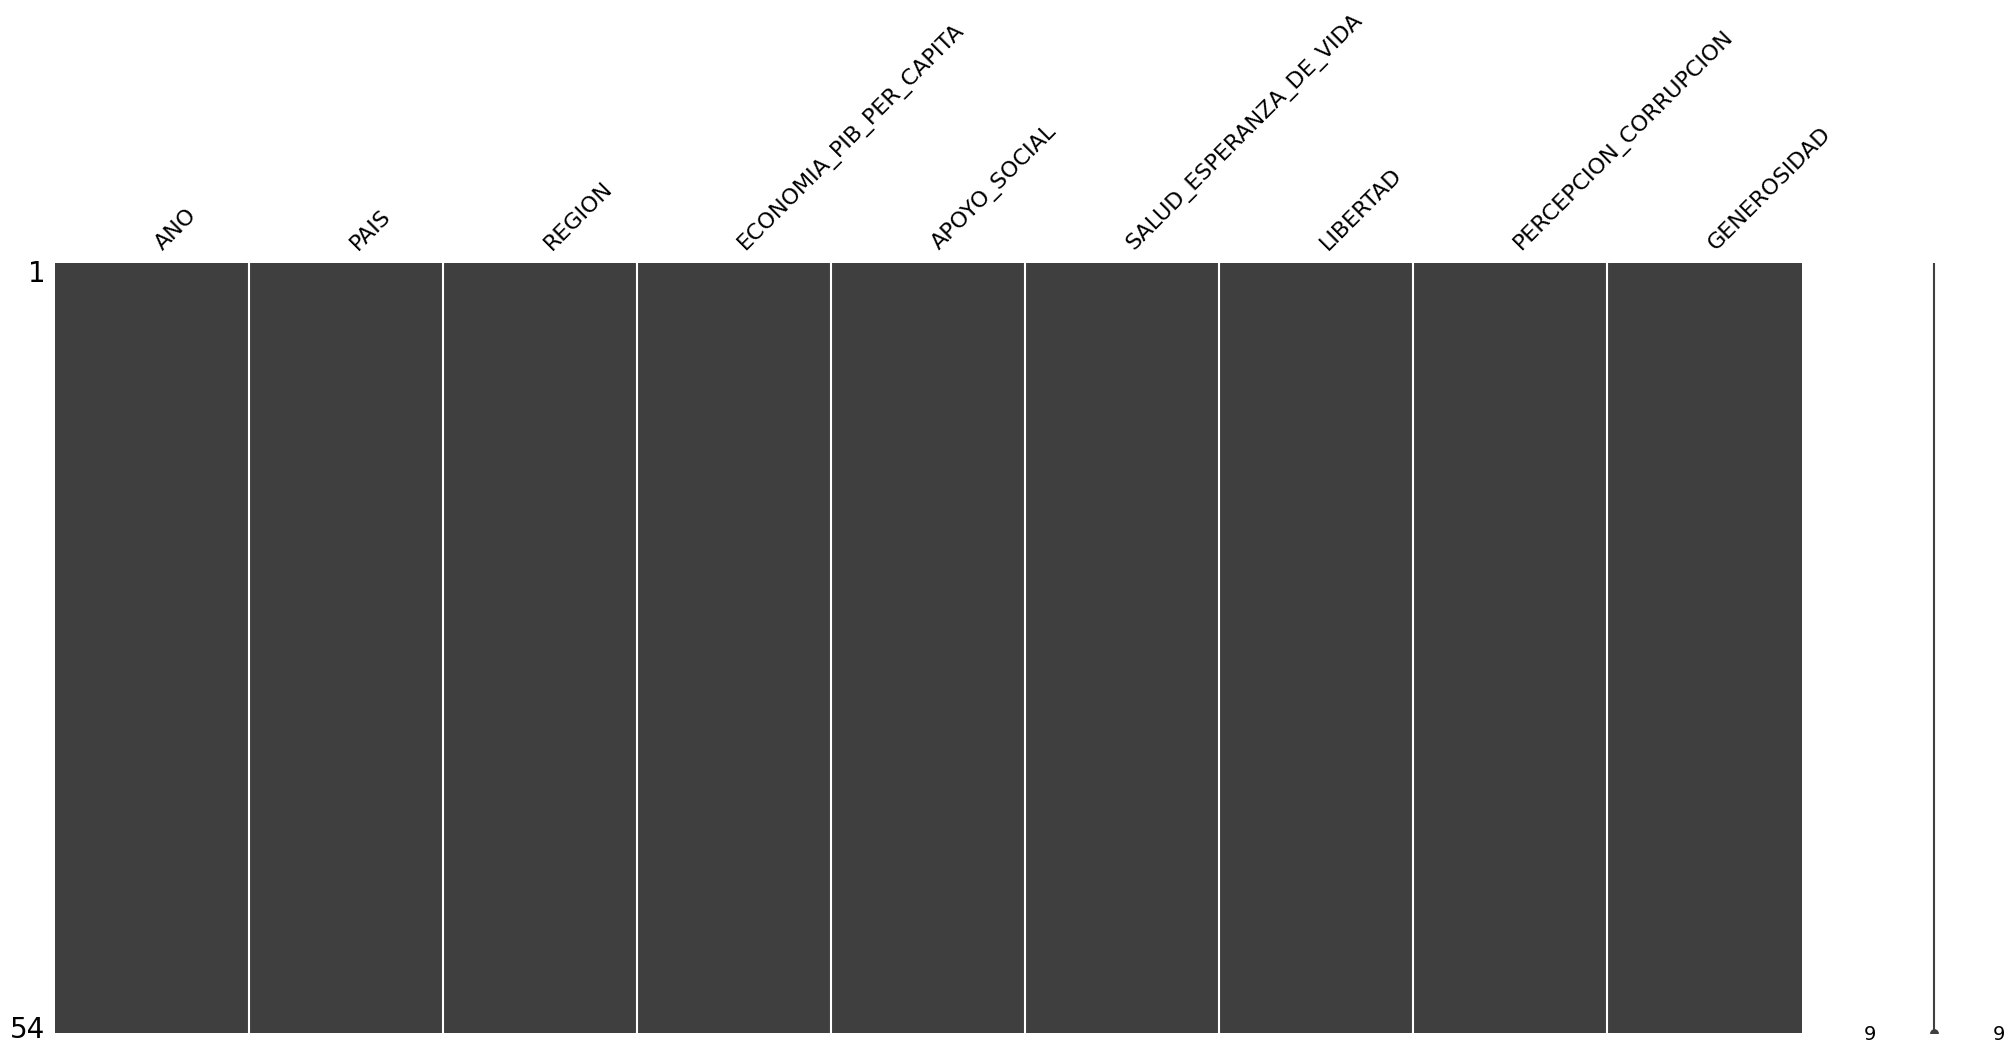

In [185]:
msno.matrix(df)

<font color=#DAF>👨‍💻 `¡Imortante!` No hay que hacer tratamiento de valores nulos porque todos los datos vienen rellenados en el CSV importado.</font>

## <font color=#FF5733>Análisis Exploratória - Valores Atípico (Outliers)</font>

Empezamos por analisar si hay valores atípico en nuestro conjunto de datos y luego identificamos por medio de las gráficas de bigotes (BoxPlot), cuales son los valores que estan fuera del Rango Intercuartil".

In [187]:
# funcion que dado un determinado dataframe genera una tabla con los valores de parámetros de Cuartiles que vamos 
# aplicar en el tramamiento de Outiers.
def calcular_estadisticas(df):
    # Crear un nuevo DataFrame para almacenar los resultados de los cuartiles
    resultados_df = pd.DataFrame(
        columns=[
            "Columna",
            "Cuartil 0.25",
            "Cuartil 0.50",
            "Cuartil 0.75",
            "Rango intercuartil",
        ]
    )

    # Crea una lista con las variables que queremos verificar los cuartiles
    numeric_columns = [
        "ECONOMIA_PIB_PER_CAPITA",
        "APOYO_SOCIAL",
        "SALUD_ESPERANZA_DE_VIDA",
        "LIBERTAD",
        "PERCEPCION_CORRUPCION",
        "GENEROSIDAD"
    ]

    # Calcular los cuartiles y los rangos intercuartiles para cada columna
    for columna in numeric_columns:
        Q1 = df[columna].quantile(0.25)
        Q2 = df[columna].quantile(0.50)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        new_row = pd.DataFrame(
            {
                "Columna": columna,
                "Cuartil 0.25": Q1,
                "Cuartil 0.50": Q2,
                "Cuartil 0.75": Q3,
                "Rango intercuartil": IQR,
                "Limite inferior": limite_inferior,
                "Limite superior": limite_superior,
            },
            index=[0],
        )

        resultados_df = pd.concat([resultados_df, new_row], ignore_index=True)

    # retorna un nuevo DataFrame (resultados_df) con los resultados
    return resultados_df.head(15).round(2)

In [188]:
%%time 
# LLama la función para conocernos los valores de los parámetros del procesos de los cuartiles que iremos aplicar a 
# nuestro conjunto de datos. Esta tabla tambien sirve para la documentación del proyecto.
calcular_estadisticas(df)

CPU times: total: 31.2 ms
Wall time: 28 ms


,Columna,Cuartil 0.25,Cuartil 0.50,Cuartil 0.75,Rango intercuartil,Limite inferior,Limite superior
0,ECONOMIA_PIB_PER_CAPITA,1.34,1.44,1.57,0.23,1.00,1.91
1,APOYO_SOCIAL,1.22,1.48,1.55,0.33,0.73,2.04
2,SALUD_ESPERANZA_DE_VIDA,0.79,0.85,0.95,0.17,0.54,1.20
3,LIBERTAD,0.58,0.65,0.69,0.10,0.43,0.84
4,PERCEPCION_CORRUPCION,0.15,0.39,0.45,0.29,-0.28,0.89
5,GENEROSIDAD,0.19,0.25,0.35,0.16,-0.05,0.58


### <font color=#FF5733>Gráficas (Situación Actual)</font>


#### Diagrama de Caja y Bigotes (BoxPlot)

In [189]:
# Genera la gráfica de Bigote con todas las variables juntas
def generar_grafica_boxplot(dataframe):
    plt.figure(figsize=(12, 8))
    plt.grid(True)
    plt.rcParams.update({"font.size": 10})  # Cambiar tamaño de la fuente
    
    # Generar el boxplot
    boxplot = dataframe.boxplot(
        column=[
            "ECONOMIA_PIB_PER_CAPITA",
            "APOYO_SOCIAL",
            "SALUD_ESPERANZA_DE_VIDA",
            "LIBERTAD",
            "PERCEPCION_CORRUPCION",
            "GENEROSIDAD",
        ],
        return_type="axes",
        showmeans=True
    )
    
    # Corregir la rotación del eje x
    ax = boxplot
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    
    return boxplot


CPU times: total: 93.8 ms
Wall time: 78 ms


matplotlib.axes._axes.Axes

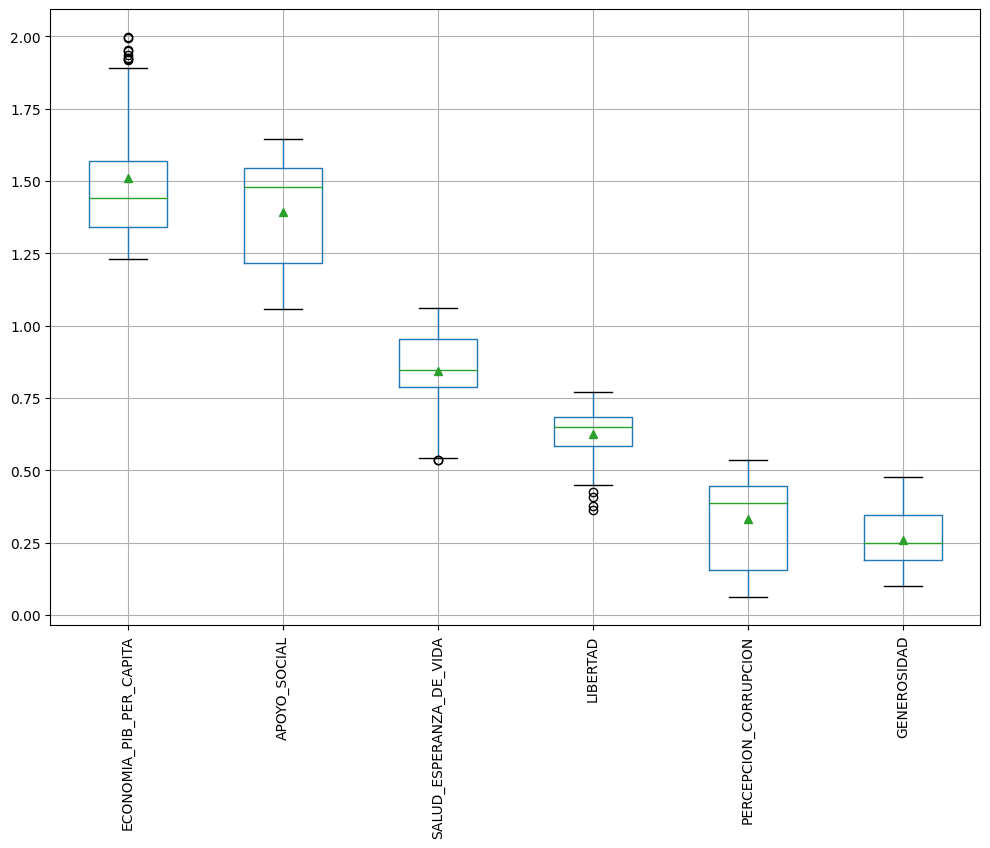

In [190]:
%%time 
# Llamada a la función
grafica = generar_grafica_boxplot(df)
type(grafica)

#### Diagrama de Caja y Bigotes (BoxPlot) generado individualmente para cada columna (variable)

In [191]:
# Define una función llamada "plot_boxplot"

# Crea el diagram de caja y bigote
def plot_boxplot(dataframe, columna):
    fig, ax = plt.subplots()
    
    # Crea la gráfica boxplot
    ax.boxplot(dataframe[columna])
    
    # Función que ajusta los valores en el eje "Y" para que todas las gráficas presenten el mismo valore en este eje.
    # ax.set_ylim(0, 120)
    # ax.set_yticks(range(0, 100, 15))
    # plt.show()
    
    # Elimina las líneas de cuadrícula
    plt.grid(False)

    # Apresenta la gráfica en pantalla
    plt.show()

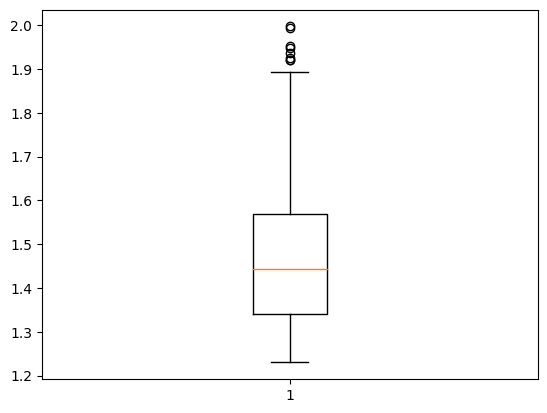

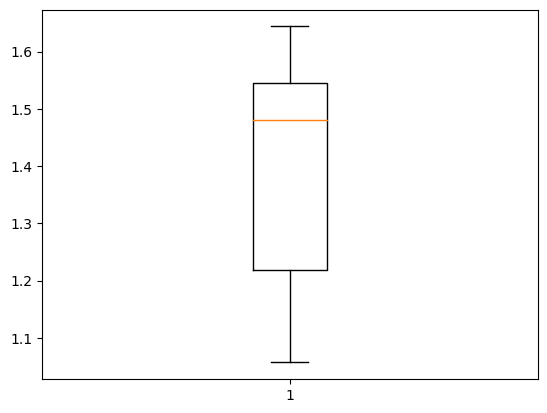

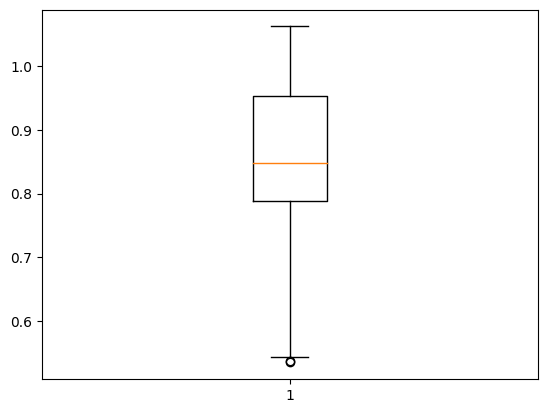

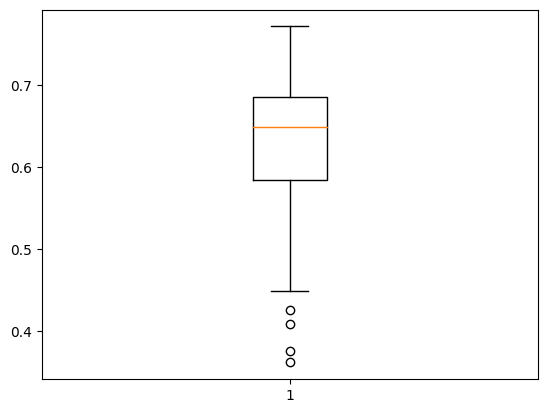

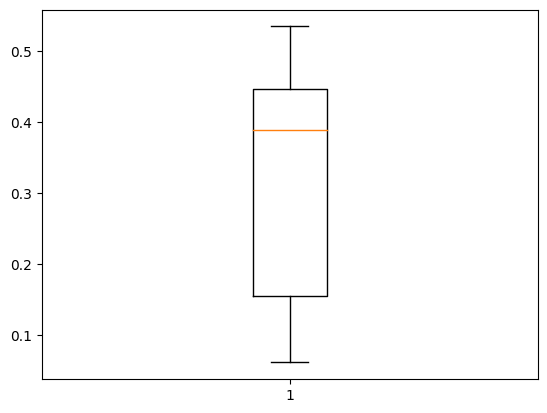

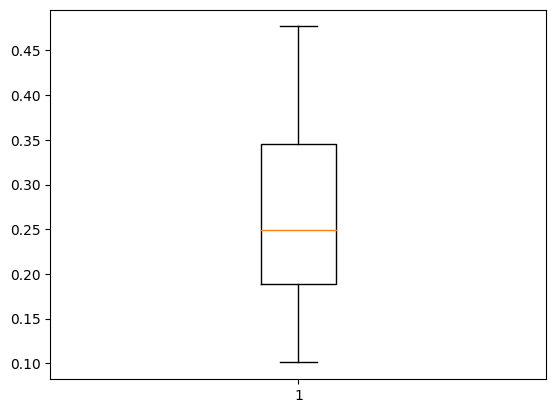

In [192]:
plot_boxplot(df, "ECONOMIA_PIB_PER_CAPITA")
plot_boxplot(df, "APOYO_SOCIAL")
plot_boxplot(df, "SALUD_ESPERANZA_DE_VIDA")
plot_boxplot(df, "LIBERTAD")
plot_boxplot(df, "PERCEPCION_CORRUPCION")
plot_boxplot(df, "GENEROSIDAD")

## <font color=#FF5733>Elimina Outliers - Empieza el proceso de limpieza de los valores atípicos</font>

In [193]:
# Define una función llamada "outliers" que devuelve una lista de valores atípicos basados em el IQR
# IQR = Q3 - Q1
# +/- 1.5*IQR

def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    ls = df.index[(df[ft] < limite_inferior) | (df[ft] > limite_superior)]

    return ls

In [194]:
%%time 
# Busca y recompila los índices de los valores atípicos (outliers) en las columnas especificadas del conjunto de 
# datos "df"

# crea una lista vacía para almacenar los índices
index_list = []
for column in [
    "ECONOMIA_PIB_PER_CAPITA",
    "APOYO_SOCIAL",
    "SALUD_ESPERANZA_DE_VIDA",
    "LIBERTAD",
    "PERCEPCION_CORRUPCION",
    "GENEROSIDAD"
]:
    index_list.extend(outliers(df, column))

CPU times: total: 31.2 ms
Wall time: 27 ms


In [195]:
# Define una función que devuelve un dataframe (marco de datos) limpio, sin valores atípicos
def eliminar(df, columna):
    columna = sorted(set(columna))
    df = df.drop(columna)
    return df

In [196]:
%%time 
df_limpio = eliminar(df, index_list)
df_limpio.head(6)

CPU times: total: 0 ns
Wall time: 998 µs


,ANO,PAIS,REGION,ECONOMIA_PIB_PER_CAPITA,APOYO_SOCIAL,SALUD_ESPERANZA_DE_VIDA,LIBERTAD,PERCEPCION_CORRUPCION,GENEROSIDAD
0,2015,Islandia,Europa Occidental,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
1,2015,Dinamarca,Europa Occidental,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
2,2015,Noruega,Europa Occidental,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
3,2015,Finlandia,Europa Occidental,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351
4,2015,Suecia,Europa Occidental,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262
5,2015,España,Europa Occidental,1.23011,1.31379,0.95562,0.45951,0.06398,0.18227


In [197]:
df_limpio.shape
print("Cantidad de datos importados en el CSV: ", df.shape, "\n", "Cantidad de datos limpios: ", df_limpio.shape)

Cantidad de datos importados en el CSV:  (54, 9) 
 Cantidad de datos limpios:  (41, 9)


### Gráficas (Después del proceso de limpeza de los Outliers)

CPU times: total: 234 ms
Wall time: 239 ms


matplotlib.axes._axes.Axes

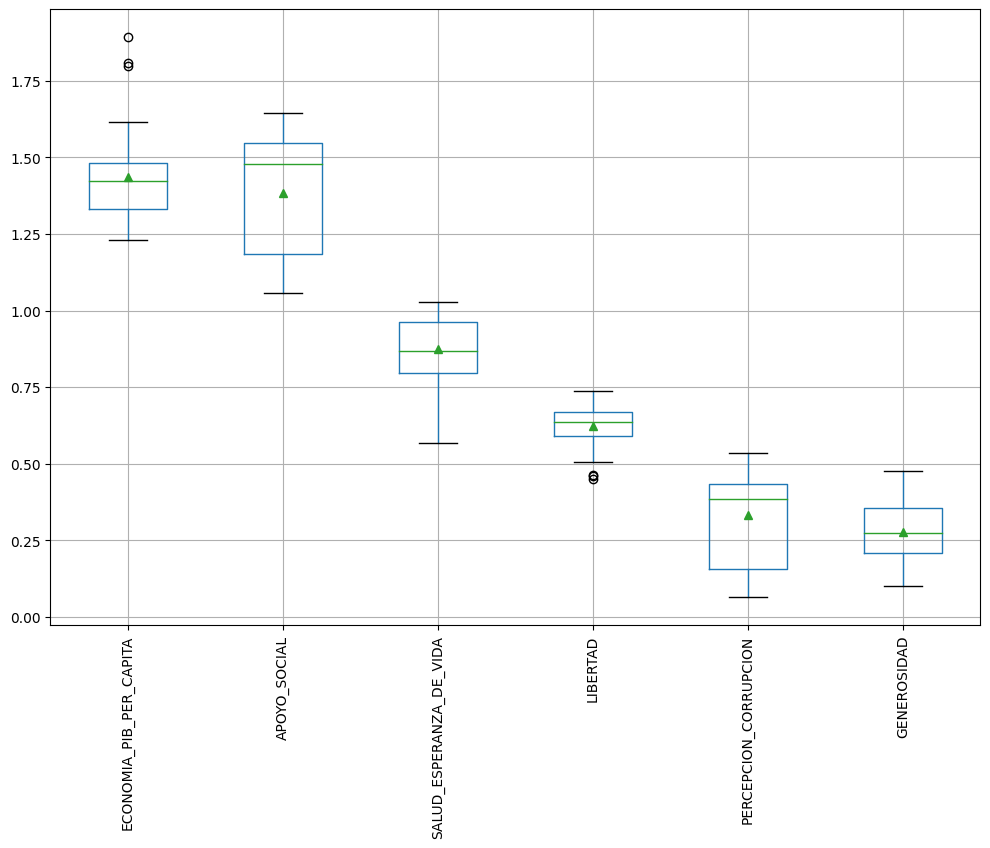

In [198]:
%%time 
# Llamada a la función
grafica = generar_grafica_boxplot(df_limpio)
type(grafica)

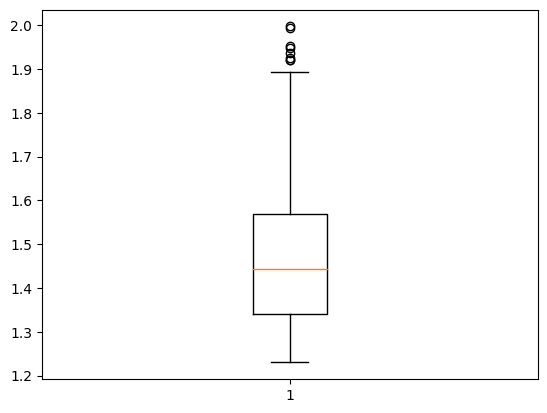

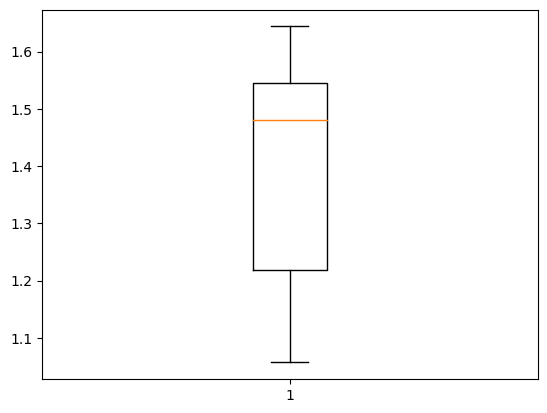

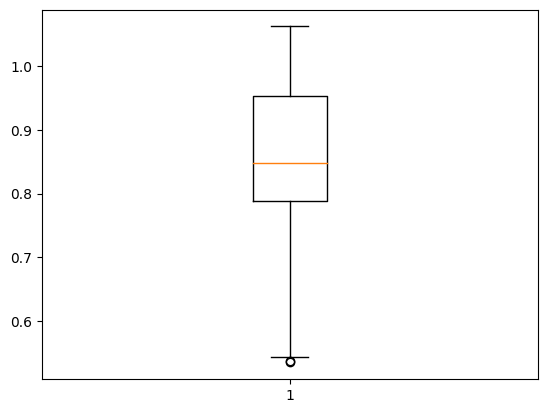

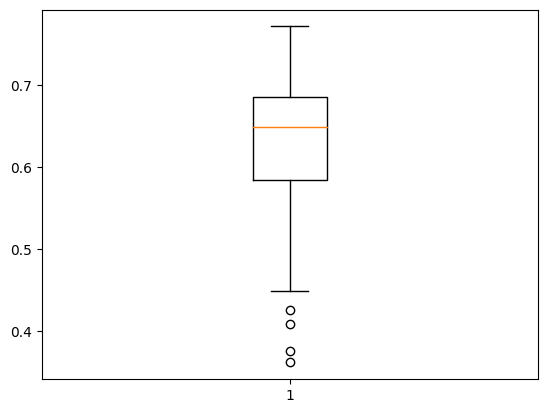

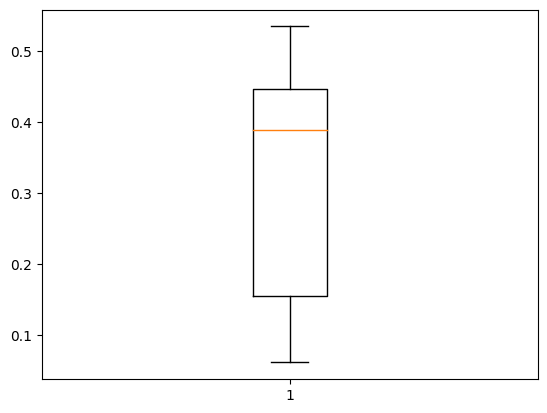

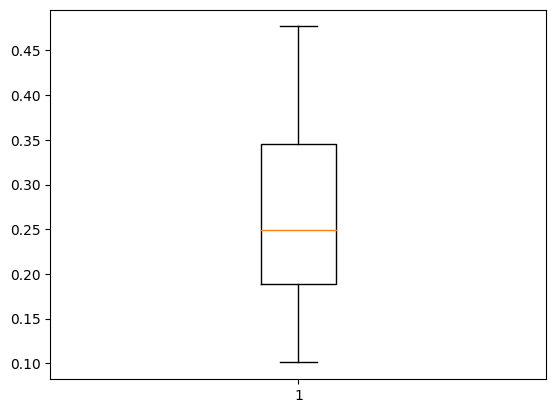

In [199]:
plot_boxplot(df, "ECONOMIA_PIB_PER_CAPITA")
plot_boxplot(df, "APOYO_SOCIAL")
plot_boxplot(df, "SALUD_ESPERANZA_DE_VIDA")
plot_boxplot(df, "LIBERTAD")
plot_boxplot(df, "PERCEPCION_CORRUPCION")
plot_boxplot(df, "GENEROSIDAD")

## <font color=#FF5733>Generar nuevo CSV con los datos cargados y preprocesados</font>

In [200]:
df.to_csv(ruta_nuevoCSV, index=False)